In [281]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
df = pd.read_csv("../raw_data/preprocessed_data.csv", index_col=0)

df.head()

,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,portuguese red,red,Douro
US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,pinot gris,white,Willamette Valley
US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,riesling,white,Lake Michigan Shore
US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,pinot noir,red,Willamette Valley
Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tandem,tempranillo-merlot,red,Navarra


In [294]:
X=df.drop(columns=['description','title'])
X.reset_index(inplace=True)

In [287]:
X

,country,points,price,province,winery,variety_adj,type,region
0,Portugal,87,15.0,Douro,Quinta dos Avidagos,portuguese red,red,Douro
1,US,87,14.0,Oregon,Rainstorm,pinot gris,white,Willamette Valley
2,US,87,13.0,Michigan,St. Julian,riesling,white,Lake Michigan Shore
3,US,87,65.0,Oregon,Sweet Cheeks,pinot noir,red,Willamette Valley
4,Spain,87,15.0,Northern Spain,Tandem,tempranillo-merlot,red,Navarra
...,...,...,...,...,...,...,...,...
111529,Germany,90,28.0,Mosel,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef),riesling,white,Mosel
111530,US,90,75.0,Oregon,Citation,pinot noir,red,Oregon
111531,France,90,30.0,Alsace,Domaine Gresser,gewurztraminer,white,Alsace
111532,France,90,32.0,Alsace,Domaine Marcel Deiss,pinot gris,white,Alsace


In [295]:
label_encoder_country = LabelEncoder()
label_encoder_province = LabelEncoder()
label_encoder_winery = LabelEncoder()
label_encoder_variety = LabelEncoder()
label_encoder_region = LabelEncoder()
one_hot_encoder_type = OneHotEncoder(sparse=False)

X['country'] = label_encoder_country.fit_transform(X['country'])
X['province'] = label_encoder_province.fit_transform(X['province'])
X['winery'] = label_encoder_winery.fit_transform(X['winery'])
X['variety_adj'] = label_encoder_variety.fit_transform(X['variety_adj'])
X['region'] = label_encoder_region.fit_transform(X['region'])

type_encoded = one_hot_encoder_type.fit_transform(X[['type']])
type_categories = one_hot_encoder_type.get_feature_names_out(['type'])
type_encoded=pd.DataFrame(type_encoded)

X.drop(columns=['type'], inplace=True)

scaler = RobustScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)


X_scaled[type_categories] = type_encoded

X_scaled

/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country,points,price,province,winery,variety_adj,region,type_red,type_rosé,type_sparkling,type_white
0,-0.24,-0.2,-0.40,-0.262931,0.484019,0.027855,-0.377907,1.0,0.0,0.0,0.0
1,0.12,-0.2,-0.44,0.422414,0.491911,-0.011142,0.863953,0.0,0.0,0.0,1.0
2,0.12,-0.2,-0.48,0.206897,0.665001,0.108635,-0.133721,0.0,0.0,0.0,1.0
3,0.12,-0.2,1.60,0.422414,0.694463,0.000000,0.863953,1.0,0.0,0.0,0.0
4,0.00,-0.2,-0.40,0.396552,0.704985,0.409471,0.167442,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
111529,-0.80,0.4,0.12,0.267241,-0.313429,0.108635,0.082558,0.0,0.0,0.0,1.0
111530,0.12,0.4,2.00,0.422414,-0.538866,0.000000,0.218605,1.0,0.0,0.0,0.0
111531,-0.88,0.4,0.20,-0.672414,-0.396554,-0.629526,-0.905814,0.0,0.0,0.0,1.0
111532,-0.88,0.4,0.28,-0.672414,-0.385243,-0.011142,-0.905814,0.0,0.0,0.0,1.0


In [256]:
neigh = NearestNeighbors(n_neighbors=1000, algorithm='ball_tree', n_jobs=-1)

In [257]:
scaler = RobustScaler()
X_scaled=scaler.fit_transform(X)

In [307]:
features_weights=[1,1,1,1,2,3,1,3,3,3,3]
X_scaled=X_scaled*features_weights
# X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
neigh.fit(X_scaled)

NearestNeighbors(algorithm='ball_tree', n_jobs=-1, n_neighbors=1000)

In [226]:
X_test=X.sample(5)
df.iloc[X_test.index]

,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Argentina,"Gotta hand it to Trivento, Concha y Toro's Arg...",86,11.0,Mendoza Province,Trivento 2007 Select Chardonnay (Mendoza),Trivento,chardonnay,white,Mendoza
US,"Spicy, fruity and extremely youthful, this com...",94,100.0,Oregon,Archery Summit 2009 Arcus Estate Pinot Noir (D...,Archery Summit,pinot noir,red,Dundee Hills
US,Winemaker Neil Collins spends his time diving ...,89,45.0,California,Lone Madrone 2014 Sheep Camp Zinfandel (Paso R...,Lone Madrone,zinfandel,red,Paso Robles Willow Creek District
France,"Rich and fruity, this wine is a full-bodied ro...",87,19.0,Provence,ChÃ¢teau Barbebelle 2014 CuvÃ©e Madeleine RosÃ...,ChÃ¢teau Barbebelle,rosé,rosé,Coteaux d'Aix-en-Provence
France,"This is a soft, off-dry wine with attractive r...",86,14.0,France Other,Bouvet-Ladubay NV RosÃ© Excellence Brut Sparkl...,Bouvet-Ladubay,sparkling blend,sparkling,Vin Mousseux


In [299]:
X_test=pd.DataFrame([X_scaled.iloc[23238]]) #Kilikanoon Oracle Shiraz
X_test=X_test._append(X_scaled.iloc[65178], ignore_index=True) #Grosset 2002 Polish Hill Riesling (Clare Valley) 91pts $30
X_test2=np.mean(X_test, axis=0)
X_test2

country          -1.360000
points            0.900000
price             1.000000
province          0.724138
winery           -0.097988
variety_adj       0.555710
region           -0.596512
type_red          1.500000
type_rosé         0.000000
type_sparkling    0.000000
type_white        1.500000
dtype: float64

In [301]:
distance, indices = neigh.kneighbors([X_test2])
df.iloc[indices[0]].head(20)

/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Australia,Only slightly less rich than its Beast counter...,91,50.0,South Australia,Hentley Farm 2007 The Beauty Shiraz (Barossa V...,Hentley Farm,shiraz,red,Barossa Valley
Australia,Classic Eden Valley aromas of lemon-lime sherb...,92,43.0,South Australia,Henschke 2015 Julius Riesling (Eden Valley),Henschke,riesling,white,Eden Valley
Australia,"This plush, fruit-driven style of Shiraz displ...",92,40.0,South Australia,Kilikanoon 2008 Covenant Shiraz (Clare Valley),Kilikanoon,shiraz,red,Clare Valley
Australia,These 100-plus-year-old vines were transplante...,93,57.0,South Australia,Langmeil 2010 Orphan Bank Shiraz (Barossa),Langmeil,shiraz,red,Barossa
Australia,"Dark berry and plum fruit dominates, but hints...",93,40.0,South Australia,John Duval Wines 2014 Entity Shiraz (Barossa V...,John Duval Wines,shiraz,red,Barossa Valley
Australia,"This is an earthy, savory style of Shiraz, wit...",92,40.0,South Australia,John Duval Wines 2013 Entity Shiraz (Barossa V...,John Duval Wines,shiraz,red,Barossa Valley
Australia,This is another top-flight example of how good...,93,40.0,South Australia,John Duval Wines 2012 Entity Shiraz (Barossa),John Duval Wines,shiraz,red,Barossa
Australia,"From a top subsection of McLaren Vale, this we...",90,50.0,South Australia,Joseph 2003 Angel Gully Shiraz (Clarendon),Joseph,shiraz,red,Clarendon
Australia,This medium-bodied shiraz is remarkably fresh ...,90,52.0,South Australia,Jim Barry 2013 The McRae Wood Shiraz (Clare Va...,Jim Barry,shiraz,red,Clare Valley


In [302]:
df.iloc[indices[0]]['type'].value_counts()

type
red      686
white    314
Name: count, dtype: int64

(0.0, 100.0)

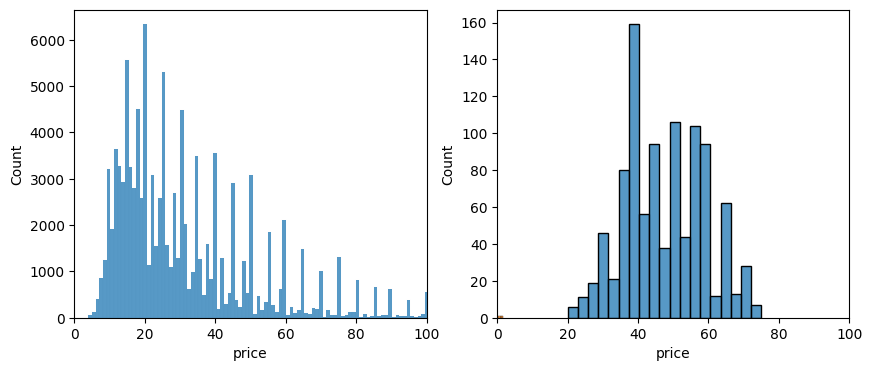

In [306]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.histplot(X['price'], ax=axes[0])
axes[0].set_xlim(0,100)
sns.histplot(df.iloc[indices[0]]['price'], ax=axes[1])
sns.histplot(X_test['price'], ax=axes[1])
axes[1].set_xlim(0,100)

(80.0, 100.0)

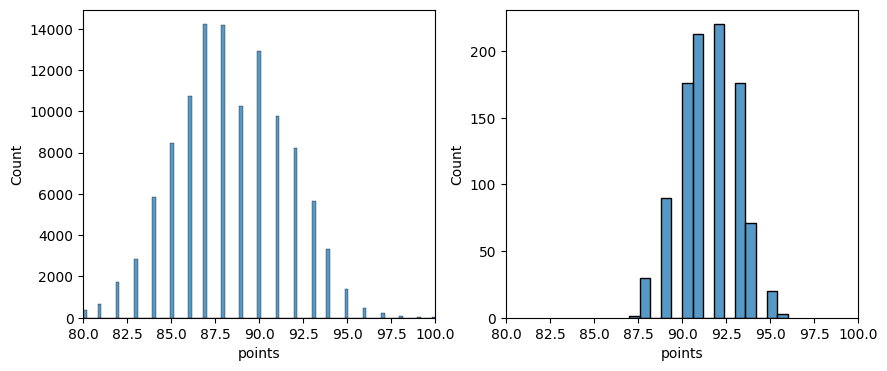

In [304]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

sns.histplot(X['points'], ax=axes[0])
axes[0].set_xlim(80,100)
sns.histplot(df.iloc[indices[0]]['points'], ax=axes[1])
sns.histplot(X_test['points'], ax=axes[1])
axes[1].set_xlim(80,100)